In [1]:
# Initial imports
import numpy as np
import random
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#from MCForecastTools import MCSimulation
import datetime
%matplotlib inline
import yfinance as yf
from pathlib import Path
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#function to extract stock data from yahoo finance
def yahoo_finance(ticker_lst):
    port_df = yf.download(ticker_lst, start='2000-01-01', end='2019-12-31',interval = '1mo')
    #port_df.sort_values(by='Date', ascending=False)
    return port_df

In [3]:
# There are 2 tables on the Wikipedia page
# we want the first table
filepath = os.path.join("..\Data", "sp500.csv")
#load sp500 data from the csv file
dataload=pd.read_csv(Path(filepath),infer_datetime_format=True, parse_dates=True, encoding='cp1252')
#drop any NaN values
dataload.dropna(inplace=True)  
dataload

,id,ticker,name,date_added_first
0,0,MMM,3M,1976-08-09
1,1,ABT,Abbott Laboratories,1964-03-31
2,2,ABBV,AbbVie,2012-12-31
3,3,ABMD,Abiomed,2018-05-31
4,4,ACN,Accenture,2011-07-06
...,...,...,...,...
498,500,YUM,Yum! Brands,1997-10-06
499,501,ZBRA,Zebra Technologies,2019-12-23
500,502,ZBH,Zimmer Biomet,2001-08-07
501,503,ZION,Zions Bancorp,2001-06-22


In [4]:
#Drop all columns except Symbol and Date_first_added
dataload.drop(['id', 'name'], axis = 1, inplace = True)
dataload.rename(columns={"date_added_first":"Date_first_added"}, inplace = True)
#reset the index
dataload = dataload.reset_index()
dataload.drop(['index'], axis=1, inplace=True)

In [5]:
#df.columns
earliest_list_date = pd.to_datetime('1901-01-01')
latest_list_date = pd.to_datetime('2000-01-01')

dataload.Date_first_added = dataload.Date_first_added.str[0:10]

added_after_1995 = dataload[pd.to_datetime(dataload['Date_first_added']) >= earliest_list_date ]
added_b4_2000 = added_after_1995[pd.to_datetime(dataload['Date_first_added']) < latest_list_date]
added_b4_2000.reset_index(inplace=True)
added_b4_2000.sort_values(by='Date_first_added',inplace =True)
added_b4_2000.shape

(161, 3)

In [6]:
added_b4_2000 = added_b4_2000.drop(['index'], axis =1)
added_b4_2000


,ticker,Date_first_added
80,HSY,1957-03-04
97,KR,1957-03-04
32,BMY,1957-03-04
65,ETR,1957-03-04
96,KMB,1957-03-04
...,...,...
152,VMC,1999-06-30
13,ADI,1999-10-12
98,LEG,1999-10-14
159,XLNX,1999-11-08


### in our testing randint gets lot of repeat tickers in the dataset so instead we are using sample() function

#for i in range (0, urange):
    #stock = added_b4_2000.iloc[random.randint(0, urange)].ticker
    #stock_port.append(stock)
#print(stock_port)


In [7]:
#create a list of stock symbols that have been added to SP500 before 2000
ticker_list = []
port_df = pd.DataFrame()
  
#set the number of random stocks to be picked if the user chooses to pick 10 stock portfolio
#to be used in future customization
on_click_10 = 10
#set the number of random stocks to be picked if the user chooses to pick 20 stock portfolio
#to be used in future customization
on_click_20 = 20
#set the number of random stocks to be picked if the user chooses to pick 30 stock portfolio
#to be used in future customization
on_click_30 = 30

#picking random stock tickers using sample() function instead of random.rand.int
random_df=added_b4_2000.sample(n=on_click_20)

#build the ticker string from ticker list
for i in range(on_click_20):
    ticker = random_df.iloc[i].ticker                    
    ticker_list.append(ticker)
#print(test_list)
tickers = ""
tickers = ' '.join(ticker_list)
print(tickers)


C GL NKE HON GPS BAX MCD PEP ORCL SHW CLX LUV CTXS SWK BDX ECL GPC PKI ADBE UNH


In [8]:
#calling the yfinance function to fetch data for the random list of tickers from sp500 dataset
port_df = yahoo_finance(tickers)
#port_df = yf.download(tickers, start='2000-01-01', end='2019-12-31',interval = '1mo')

[*********************100%***********************]  20 of 20 completed


In [9]:
#port_df.to_csv(r'.\test.csv', sep=',', encoding='utf-8', header='true') 
port_df.dropna(inplace=True)
port_df.head(5)

Adj Close                                                          \
                 ADBE        BAX        BDX           C        CLX       CTXS   
Date                                                                            
2000-01-01  13.668243  11.390712  18.704508  261.096100  27.040649  52.634888   
2000-02-01  25.319601   9.718882  22.141861  237.047623  22.995808  80.869820   
2000-03-01  27.631260  11.178948  18.793802  275.027405  18.766285  50.813282   
2000-04-01  30.027847  11.613620  18.360392  271.008240  20.898817  46.834507   
2000-05-01  27.948402  12.395267  20.912922  286.382690  22.655396  40.363003   

                                                       ...      Volume  \
                  ECL        GL        GPC        GPS  ...         HON   
Date                                                   ...               
2000-01-01  13.650975  9.039713  11.702226  29.617048  ...  80936404.0   
2000-02-01  10.959572  7.133784  10.944316  32.019562  ...  62199071.0   
2000-03-01  14.232890  8.326494  11.580965  33.029972  ...  78221401.0   
2000-04-01  15.206983  9.024123  12.890111  24.368391  ...  48185933.0   
2000-05-01  14.890681  9.827198  11.723861  23.249451  ...  38383962.0   

                                                                             \
                   LUV          MCD          NKE          ORCL          PEP   
Date                                                                          
2000-01-01  67578000.0  109356500.0  142004800.0  1.544676e+09   95170300.0   
2000-02-01  83106300.0  116297800.0  397492800.0  1.192036e+09   84131900.0   
2000-03-01  64569150.0  107742400.0  325264000.0  1.381304e+09  106743700.0   
2000-04-01  54729600.0   88858600.0  187183200.0  1.299359e+09   68836700.0   
2000-05-01  41172150.0   79034300.0  145275200.0  1.081649e+09   84691100.0   

                                                            
                   PKI         SHW        SWK          UNH  
Date                                                        
2000-01-01  11607200.0  45177600.0  4268300.0  181327200.0  
2000-02-01  23528400.0  49552200.0  5082200.0  221531200.0  
2000-03-01  22026200.0  49212300.0  7332600.0  158871200.0  
2000-04-01  14462400.0  42936300.0  5494200.0  142981600.0  
2000-05-01  13443000.0  34804800.0  6518200.0  250012000.0  

[5 rows x 120 columns]

In [10]:
data = port_df['Adj Close']

data.head()

,ADBE,BAX,BDX,C,CLX,CTXS,ECL,GL,GPC,GPS,HON,LUV,MCD,NKE,ORCL,PEP,PKI,SHW,SWK,UNH
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,13.668243,11.390712,18.704508,261.096100,27.040649,52.634888,13.650975,9.039713,11.702226,29.617048,27.916468,9.711505,21.869638,4.513891,21.214029,20.048592,19.861460,4.123972,14.776020,5.514141
2000-02-01,25.319601,9.718882,22.141861,237.047623,22.995808,80.869820,10.959572,7.133784,10.944316,32.019562,27.989161,11.234877,18.578217,2.821183,31.532387,18.873577,25.722391,4.474946,13.526309,5.319067
2000-03-01,27.631260,11.178948,18.793802,275.027405,18.766285,50.813282,14.232890,8.326494,11.580965,33.029972,30.767588,12.682074,21.869638,3.931056,33.151482,20.489216,26.468679,5.212080,15.511141,6.203410
2000-04-01,30.027847,11.613620,18.360392,271.008240,20.898817,46.834507,15.206983,9.024123,12.890111,24.368391,32.701965,13.219558,22.271921,4.317128,33.947739,21.649492,22.090408,5.859913,17.516054,6.941936
2000-05-01,27.948402,12.395267,20.912922,286.382690,22.655396,40.363003,14.890681,9.827198,11.723861,23.249451,31.935518,11.695694,20.955351,4.261223,30.523773,24.009924,20.949717,5.477101,15.957423,7.761696


In [11]:
#try to find mean for each row
data['monthly_avg'] = data.sum(axis=1)/on_click_20
data.sample()

,ADBE,BAX,BDX,C,CLX,CTXS,ECL,GL,GPC,GPS,...,LUV,MCD,NKE,ORCL,PEP,PKI,SHW,SWK,UNH,monthly_avg
Date,,,,,,,,,,,,,,,,,,,,,
2000-09-01,38.555134,14.876654,19.002831,332.826416,22.734016,15.387795,14.084381,10.088631,9.470041,13.31151,...,14.786067,17.663935,3.987833,33.443443,27.237856,41.729393,5.090138,13.926179,10.279529,33.973347


In [12]:
#Value of $10000 invested 
initial_val =  data.iloc[0,0]
num_of_shares = 10000 / initial_val
print(num_of_shares)

731.6229087637117


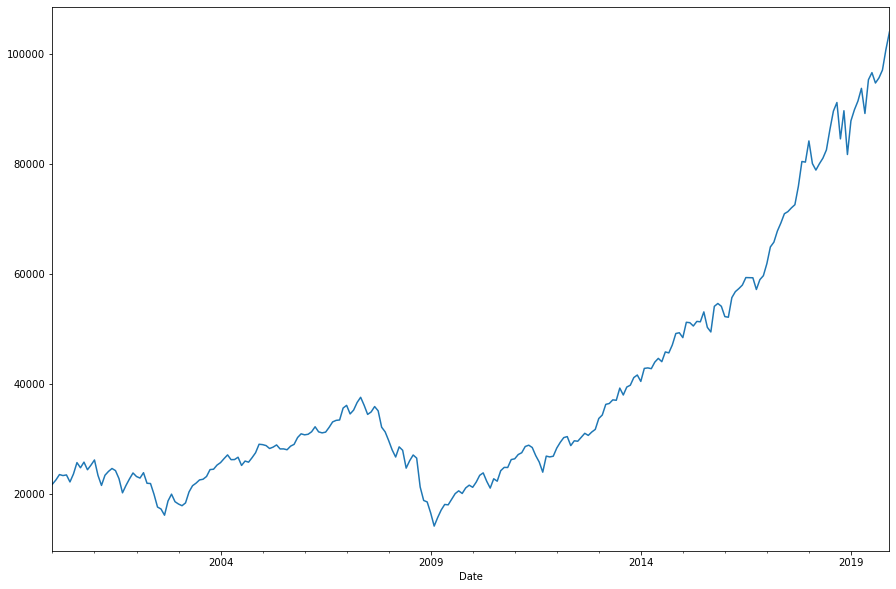

In [13]:
#calculate the monthly value of stock portfolio
data['monthly_value'] = num_of_shares * data.iloc[:,20] 
rand_plot = data['monthly_value'].plot(figsize= (15,10))
#data

In [14]:
def get_fund_data(ticker):   
    #print(ticker)
    mg_fund_df = yahoo_finance(ticker)
    mg_fund_df.dropna(inplace=True)
    return mg_fund_df['Adj Close']

In [15]:
monthly_values = pd.DataFrame()
mg_list = ['FLCSX', 'PRCOX', 'HAIAX', 'DFUSX','VPMCX','PRBLX','DGAGX','TISCX','VDIGX','DFELX','MRGAX','BRLIX']
for ticker in mg_list:
    data_yf = get_fund_data(ticker)
    fund_data = data_yf.to_frame()
    initial_value = fund_data.iloc[0,0]
    num_of_shares = 10000 / initial_value
    monthly_values[ticker] = num_of_shares * fund_data.iloc[:,0]
monthly_values   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FLCSX,PRCOX,HAIAX,DFUSX,VPMCX,PRBLX,DGAGX,TISCX,VDIGX,DFELX,MRGAX,BRLIX
Date,,,,,,,,,,,,
2000-01-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2000-02-01,10598.949499,9946.488619,9976.814103,9816.676565,11538.335628,10017.196430,9453.528470,9748.132803,9564.633014,9845.560981,9660.193094,9882.903035
2000-03-01,10771.443109,10996.658548,11043.276745,10751.605010,11922.514025,10825.455115,10212.766759,10755.595598,9946.417141,10702.701019,10661.406641,10843.091257
2000-04-01,10210.829632,10628.764778,10602.778416,10439.309123,11871.282460,10856.243860,10313.149189,10447.759495,10141.826839,10362.935758,10418.689199,10632.319226
2000-05-01,9798.760256,10354.515061,10340.028677,10228.133855,11304.021145,11037.254089,10428.446892,10289.178553,10384.452655,10123.553730,10394.417116,10105.386016
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,24195.685139,33248.630686,31669.873900,29361.542896,48068.989562,58904.559372,28156.671770,28847.384216,39645.771961,23254.469936,37172.161545,28840.535264
2019-09-01,24862.654606,33816.578543,32228.583604,29802.483273,48731.578334,59090.411974,28398.734236,29452.060859,39711.125552,23650.655240,37653.278077,29473.758174
2019-10-01,25810.871985,34597.507709,32738.282265,30559.595823,50686.407489,59387.544777,29008.751989,30027.240204,39488.913607,24194.155834,38168.760559,30106.983590


<AxesSubplot:xlabel='Date'>

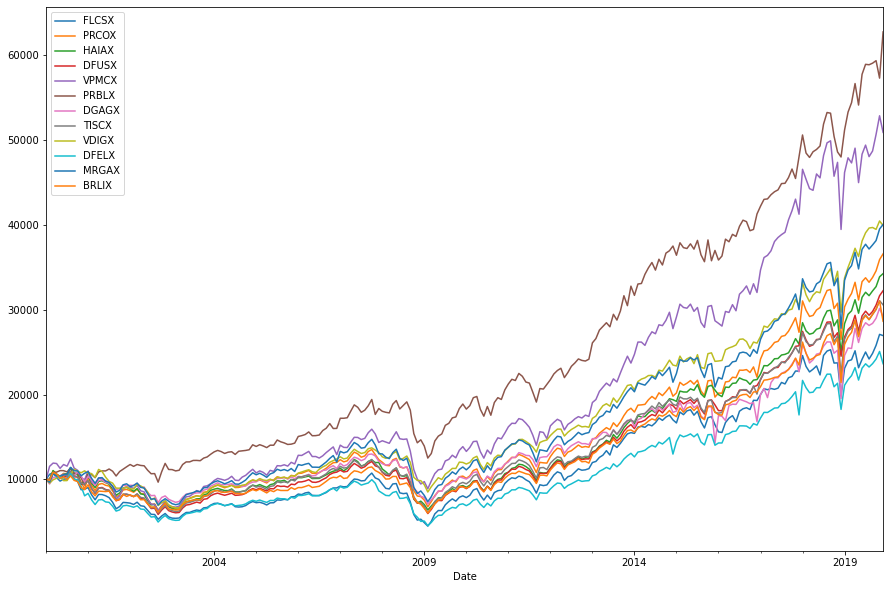

In [16]:
monthly_values.plot(figsize= (15,10))   